## Boosting

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, iris.target, test_size=0.3)

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base = DecisionTreeClassifier(criterion='gini', max_depth=1)
model_ada = AdaBoostClassifier(estimator = base, n_estimators=10, algorithm='SAMME')
model_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=10)

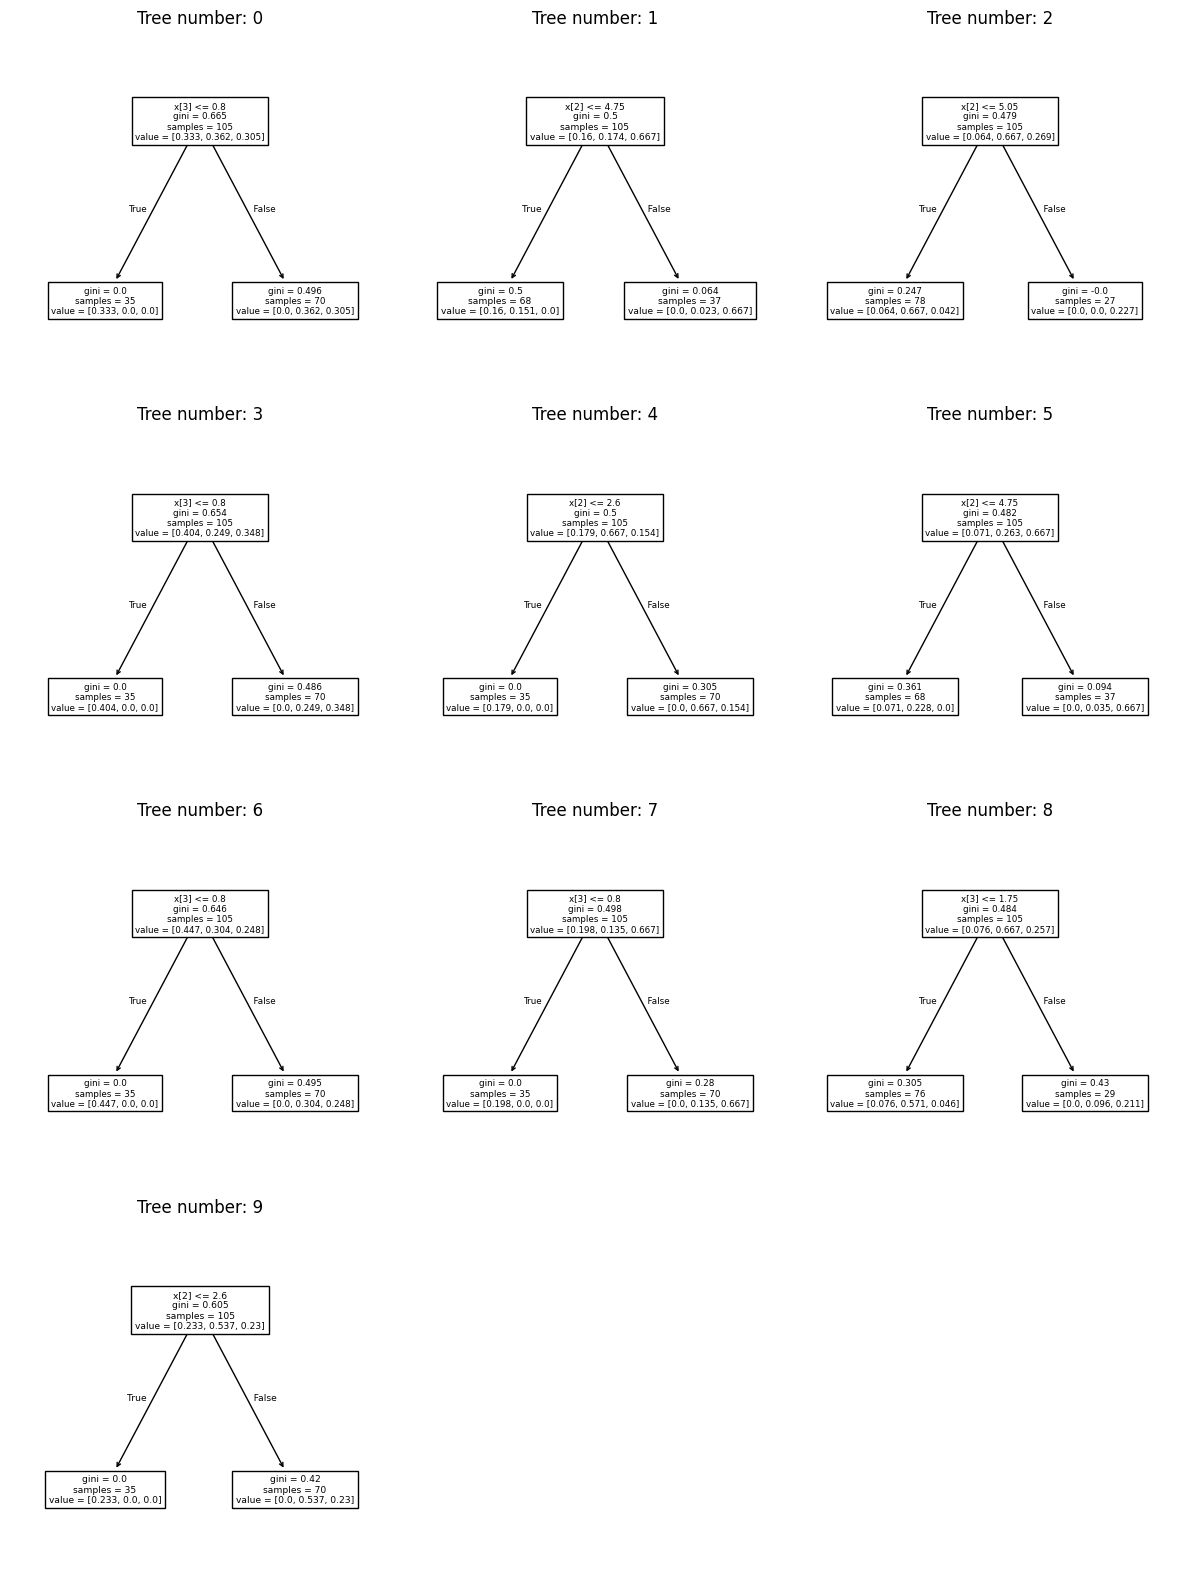

In [4]:
from sklearn import tree
import matplotlib.pyplot as plt

# model_ada is your trained AdaBoostClassifier
n = len(model_ada.estimators_)  # number of trees in the ensemble
ncols = 3  # number of columns in the subplot grid
nrows = n // ncols + (n % ncols > 0)  # number of rows in the subplot grid

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))  # adjust the size as needed
axs = axs.ravel()  # flatten the axes array

for i in range(n):
    base = model_ada.estimators_[i]
    tree.plot_tree(base, ax=axs[i])
    axs[i].set_title('Tree number: {}'.format(i))

# remove the empty subplots
for j in range(i+1, nrows*ncols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()




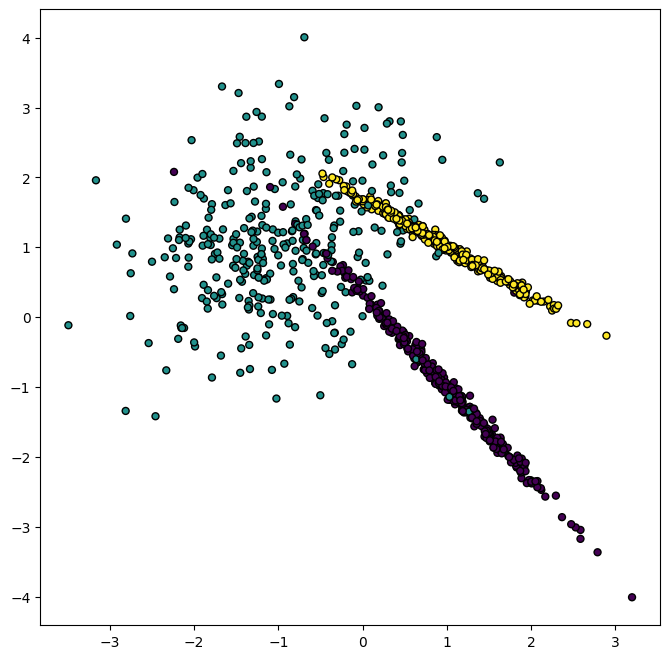

In [5]:
from sklearn.datasets import make_classification
plt.figure(figsize=(8, 8))
X, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, 
n_informative=2, n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')


In [6]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples = 3000, n_features=10, n_redundant=0, 
n_informative=10, n_clusters_per_class=1, n_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
accuracy_history = []

In [8]:
for i in range(1, 20):
 tree = DecisionTreeClassifier(max_depth = i)
 model_ada = AdaBoostClassifier(estimator=tree, n_estimators=50, algorithm='SAMME')
 model_ada.fit(X_train, y_train)
 y_pred = model_ada.predict(X_test)
 accuracy_history.append(accuracy_score(y_test, y_pred))

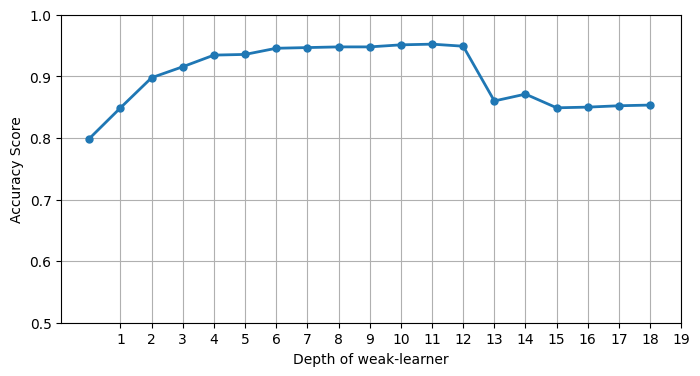

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(accuracy_history, marker='o', linestyle='solid', linewidth=2, 
markersize=5)
plt.grid(True)
plt.xticks(range(1,20))
plt.ylim((0.5,1))
plt.xlabel("Depth of weak-learner")
plt.ylabel("Accuracy Score")
plt.show()

## Stacking

In [10]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples = 3000, n_features=10, n_redundant=0, 
n_informative=10, n_clusters_per_class=1, n_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [12]:
models = [('Logistic Regression',LogisticRegression()),
 ('Nearest Neighbors',KNeighborsClassifier()),
 ('Decision Tree',DecisionTreeClassifier()),
 ('Support Vector Classifier',SVC()),
 ('Naive Bayes',GaussianNB())]

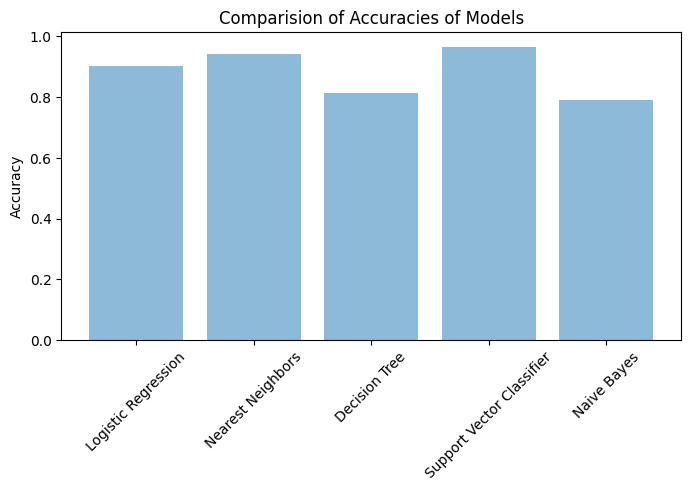

In [13]:
accuracy_list = []
for model in models:
 model[1].fit(X_train, y_train)
 y_pred = model[1].predict(X_test)
 accuracy_list.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in models], rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()

In [14]:
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(estimators=models, 
final_estimator=LogisticRegression(), cv=5)
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Logistic Regression', LogisticRegression()),
                               ('Nearest Neighbors', KNeighborsClassifier()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Support Vector Classifier', SVC()),
                               ('Naive Bayes', GaussianNB())],
                   final_estimator=LogisticRegression())

In [15]:
y_pred = stacking_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9611111111111111

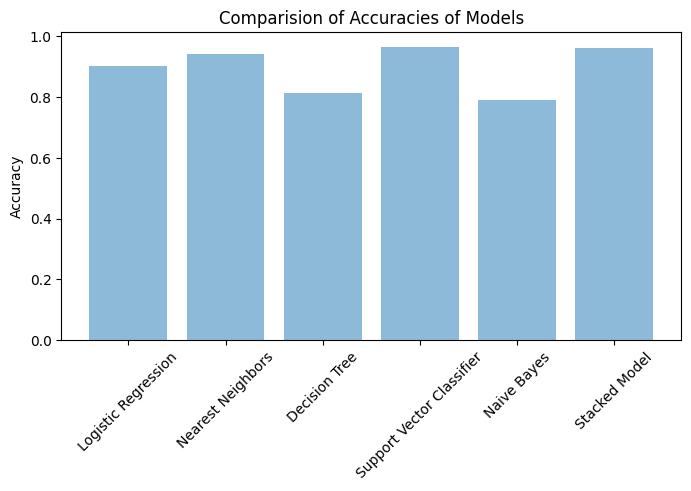

In [16]:
accuracy_list.append(accuracy_score(y_test, y_pred))
model_names = [x[0] for x in models]
model_names.append("Stacked Model")
plt.figure(figsize=(8, 4))
y_pos = range(len(model_names))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, model_names, rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()